In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rebound

morado = '#8b008b' # morado
azul = '#00008b' # azul
amarillo = '#FDB813' # amarillo

%matplotlib inline

# Ejemplo paso a pasito

In [2]:
"""Características de la simulación"""

gatito = rebound.Simulation()        # sim1 será el nombre de nuestra primer
                                   # simulación
gatito.units = ('AU', 'yr', 'Msun')  # Unidades que queremos usar
gatito.integrator = "whfast"         # Integrador de REBOUND
gatito.dt = 0.001                    # Tamaño del paso de integración

tmax = 1                           # Tiempo de la simulación
N = 101                            # Número de salidas
tiempos = np.linspace(0., tmax, N) # Momentos en que generará las salidas

print(tiempos)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [3]:
"""Cuerpos a incluir en la simulación"""

# Estrella central
gatito.add(m=1.0)

# Nuestro planeta
gatito.add(m=3*10**-6,a=1.0,e=0.017,inc=np.pi/4,Omega=0.,omega=0.,f=0.)  # Planeta de una masa terrestre

In [4]:
gatito.status()

---------------------------------
REBOUND version:     	3.10.2
REBOUND built on:    	Dec  4 2019 11:37:47
Number of particles: 	2
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=3e-06 x=0.9830000000000001 y=0.0 z=0.0 vx=0.0 vy=4.518986430542775 vz=4.518986430542774>
---------------------------------


In [5]:
"""Arreglos para almacenar la información"""

t = []      
xEstrella, yEstrella, zEstrella = [],[],[]
xPlaneta, yPlaneta, zPlaneta = [],[],[]

In [6]:
"""Haciendo la integración"""

for i,tiempo in enumerate(tiempos):
    
    gatito.integrate(tiempo)
    t.append(tiempo)
    
    # Con este ciclo guardaremos la información de la posición
    j = 0
    for p in gatito.particles:
        # p puede valer 0 o 1 0--Sol 1--Planeta
        if j == 0: # Posición de la Estrella
            xEstrella.append(p.x)
            yEstrella.append(p.y)
            zEstrella.append(p.z)
        if j == 1: # Posición del Planeta
            xPlaneta.append(p.x)
            yPlaneta.append(p.y)
            zPlaneta.append(p.z)
        j = j + 1

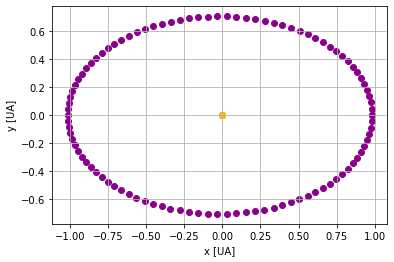

In [7]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(xEstrella, yEstrella, color = amarillo)

ax.scatter(xPlaneta, yPlaneta, color = morado)

ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]');

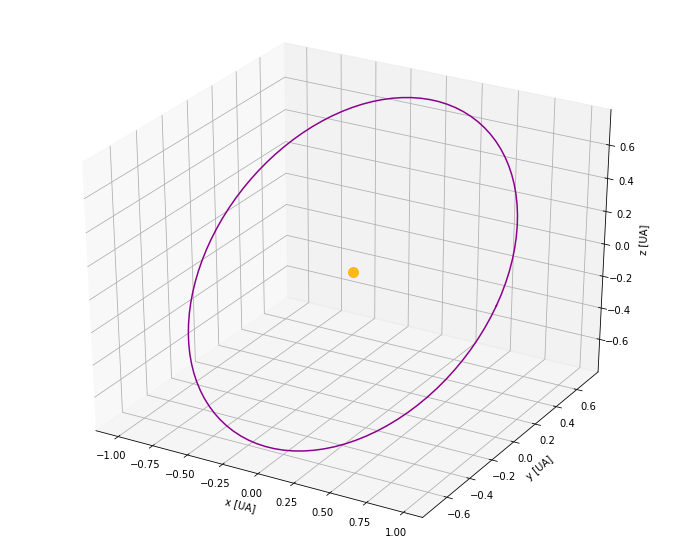

In [8]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Estrella
ax.scatter(0.,0.,0.,'*',color = amarillo, s = 100)

ax.plot(xPlaneta, yPlaneta, zPlaneta, color = morado)

ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')
ax.set_zlabel('z [UA]');

# Haciéndolo rápido con una función

In [9]:
def orbita(m,a,e,inc,Omega,omega,f):
    
    # Características de la simulación
    sim = rebound.Simulation()
    sim.units = ('AU', 'yr', 'Msun')   # Unidades que queremos usar
    sim.integrator = "whfast"          # Integrador de REBOUND
    sim.dt = 0.001                     # Tamaño del paso de integración
    tmax = a**(3./2.)                  # Tiempo de la sim (periodo orbital)
    N = 500                            # Número de salidas
    tiempos = np.linspace(0., tmax, N) # Momentos en que generará las salidas
    
    # Objetos en la simulación
    sim.add(m=1.0)  # Estrella
    sim.add(m=m,a=a,e=e,inc=inc,Omega=Omega,omega=omega,f=f)

    # Arreglos para la info
    t = []
    xPlaneta, yPlaneta, zPlaneta = [],[],[]
    
    # Haciendo la integración
    for i,tiempo in enumerate(tiempos):
    
        sim.integrate(tiempo)
        t.append(tiempo)

        j = 0
        for p in sim.particles:
            if j == 1: 
                xPlaneta.append(p.x)
                yPlaneta.append(p.y)
                zPlaneta.append(p.z)
            j = j + 1
        
    return xPlaneta, yPlaneta, zPlaneta 

## Variando la excentricidad

In [10]:
perritas = orbita(m = 3.2*10**-7, a = 1.52, e = 0.0934, inc = 0.0322, Omega = 0.865, omega = 0., f=0.)

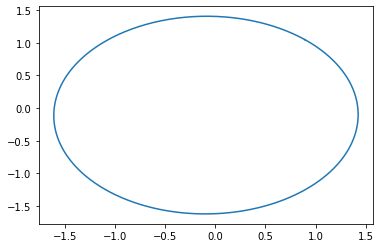

In [11]:
xMarte = perritas[0]
yMarte = perritas[1]
zMarte = perritas[2]

plt.plot(xMarte, yMarte)

## Variando la excentricidad

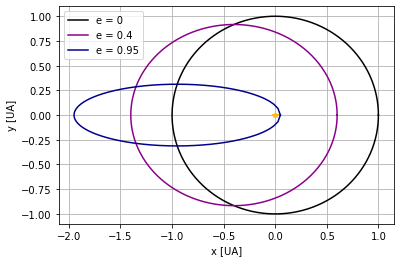

In [12]:
fig, ax = plt.subplots()
ax.grid(True)
# Estrella
ax.plot(0.,0.,'*',color = amarillo)

# Planeta 1
orbita1 = orbita(m=3*10**-6,a=1.0,e=0.,inc=0.,Omega=0.,omega=0.,f=0.)
ax.plot(orbita1[0], orbita1[1], color = '#000000', label = 'e = 0')

# Planeta 2
orbita2 = orbita(m=3*10**-6,a=1.0,e=0.4,inc=0.,Omega=0.,omega=0.,f=0.)
ax.plot(orbita2[0], orbita2[1], color = morado, label = 'e = 0.4')

# Planeta 3
orbita3 = orbita(m=3*10**-6,a=1.0,e=0.95,inc=0.,Omega=0.,omega=0.,f=0.)
ax.plot(orbita3[0], orbita3[1], color = azul, label = 'e = 0.95')

ax.legend(loc = 'best')
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]');

## Variando $\omega$

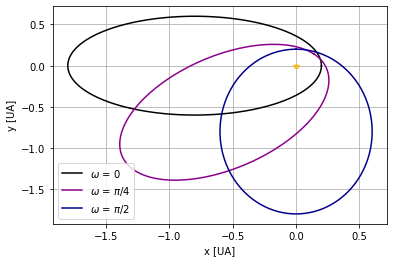

In [13]:
fig, ax = plt.subplots()
ax.grid(True)
# Estrella
ax.plot(0.,0.,'*',color = amarillo)

# Planeta 1
orbita1 = orbita(m=3*10**-6,a=1.0,e=0.8,inc=0.,Omega=0.,omega=0.*np.pi/4.,f=0.)
ax.plot(orbita1[0], orbita1[1], color = '#000000', label = '$\omega$ = 0')

# Planeta 2
orbita2 = orbita(m=3*10**-6,a=1.0,e=0.8,inc=0.,Omega=0.,omega=1.*np.pi/4.,f=0.)
ax.plot(orbita2[0], orbita2[1], color = morado, label = '$\omega$ = $\pi$/4')

# Planeta 3
orbita3 = orbita(m=3*10**-6,a=1.0,e=0.8,inc=0.,Omega=0.,omega=2.*np.pi/4.,f=0.)
ax.plot(orbita3[0], orbita3[1], color = azul, label = '$\omega$ = $\pi$/2')

ax.legend(loc = 'best')
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]');

## Variando más elementos orbitales

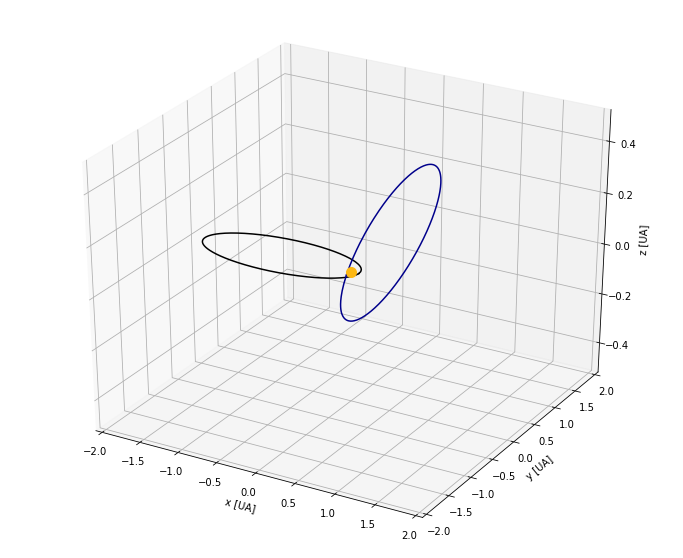

In [14]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Estrella
ax.scatter(0.,0.,0.,'*',color = amarillo, s = 100)

# Planeta 1
orbita1 = orbita(m=3*10**-6,a=1.0,e=0.9,inc=0.,Omega=0.,omega=0.,f=0.)
ax.plot(orbita1[0], orbita1[1], orbita1[2], color = '#000000')

# Planeta 2
orbita2 = orbita(m=3*10**-6,a=1.0,e=0.9,inc=np.pi/4,Omega=3*np.pi/2,omega=0.,f=0.)
ax.plot(orbita2[0], orbita2[1], orbita2[2], color = azul)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-0.5,0.5)

ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')
ax.set_zlabel('z [UA]');